# Diamants

## Imene KOLLI, Groupe 4

Ce document est mon mini projet qui compte comme un examen d'économétrie.

### La base de données:

Les données comprenaient les prix et les attributs d'environ 54 000 diamants taille ronde. Les attributs comprenaient les quatre C des diamants (carat, coupure, couleur, clarté), ainsi que des mesures supplémentaires telles que la profondeur et la table.


Dans cette enquête, je voulais regarder les caractéristiques des diamants qui pourraient être utilisées pour prédire leurs prix

# Analyse de donnees:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

In [53]:
diamants = pd.read_csv('diamants.csv')

In [54]:
print('les dimentions de la base de donnees:', diamants.shape)
print('le type des variables de la base de donnees:', diamants.dtypes)
print('\n 10 premiere lignes de la base de donnees')
diamants.head(10)

les dimentions de la base de donnees: (53940, 10)
le type des variables de la base de donnees: carat         float64
coupure        object
couleur        object
clarte         object
profondeur    float64
table         float64
prix            int64
x             float64
y             float64
z             float64
dtype: object

 10 premiere lignes de la base de donnees


,carat,coupure,couleur,clarte,profondeur,table,prix,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [55]:
# convertir la coupure, couleur, et clarte a des variable qualitatives ordinales:
ordinal_var_dict = {'coupure': ['Fair','Good','Very Good','Premium','Ideal'],
                    'couleur': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarte': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    diamants[var] = diamants[var].astype(ordered_var)

In [56]:
# Statistique descriptive de mes variables numeriques :
print(diamants.describe())

              carat    profondeur         table          prix             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  



### La structure de l'ensemble de donnée :

Il y a 53 940 diamants dans l'ensemble de données avec 10 caractéristiques (carat, coupure, couleur, clarté, profondeur, table, prix, x, y et z). La plupart des variables sont de nature numérique, mais les variables de coupure, de couleur et de clarté sont des variables de valeurs ordonnées avec les niveaux suivants.

(pire) ——> (meilleur) <br>
coupure: Fair, Good, Very Good, Premium, Ideal <br>
couleur: J, I, H, G, F, E, D <br>
clarté: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF

### La variable d'interet :

Ce qui m'intéresse le plus, c'est de déterminer quelles sont les meilleures variables pour prédire le prix des diamants de l'ensemble de données.


Je commencerai par regarder la distribution de la principale variable d'intérêt: le prix.

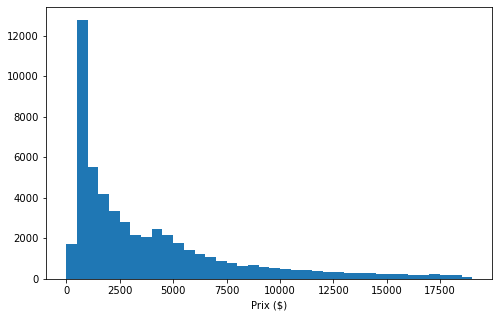

In [57]:
binsize = 500
bins = np.arange(0, diamants['prix'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = diamants, x = 'prix', bins = bins)
plt.xlabel('Prix ($)')
plt.show()

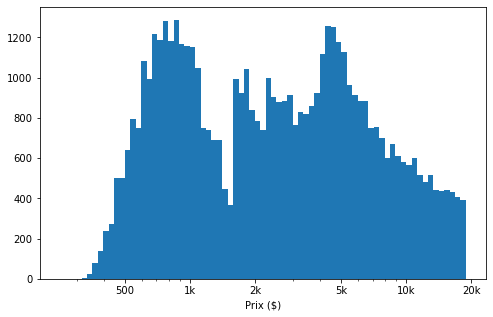

In [58]:
# mettons-la plutôt sur une échelle logarithmique
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(diamants['prix'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = diamants, x = 'prix', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Prix ($)')
plt.show()

Le prix a une distribution à longue queue, avec beaucoup de diamants sur le bas prix et peu sur le haut de gamme. Lorsqu'elle est tracée sur une échelle logarithmique, la distribution des prix semble à peu près bimodale, avec un pic entre 500 et 1 000, et un second pic un peu en dessous de 5 000. 
il y a une forte augmentation de la fréquence juste avant 2000, plutôt qu'une montée en puissance régulière .

Ensuite, la première variable prédictive d'intérêt: carat.

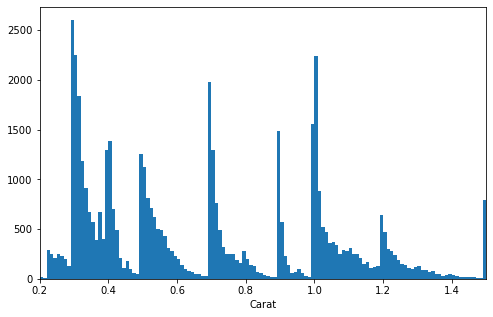

In [59]:
binsize = 0.01
bins = np.arange(0.2, 1.51, 0.01)

plt.figure(figsize=[8, 5])
plt.hist(data = diamants, x = 'carat', bins = bins)
plt.xlim([0.2,1.5])
plt.xlabel('Carat')
plt.show()

Dans le cas du carat, la petite taille du bac s'avère très éclairante. Il y a de très grands pics de fréquence au niveau des barres avec un chiffre de précision (par exemple 0,3, 0,7, 1,0); la fréquence diminue rapidement jusqu'au prochain pic. Ceux-ci représentent probablement des tailles de diamant standard à utiliser dans les bijoux.

Je vais maintenant passer aux autres variables «c» de l'ensemble de données: coupure, couleur et clarté.

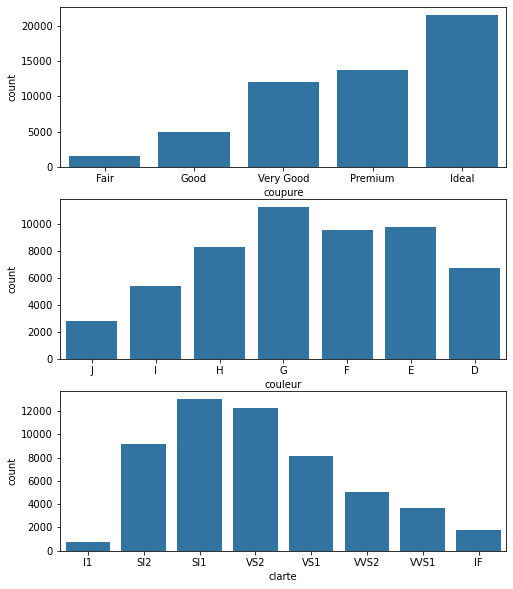

In [60]:
# tracons les trois ensemble pour avoir une idée de la distribution de chaque variable ordinale.

fig, ax = plt.subplots(nrows=3, figsize = [8,10])

default_color = sb.color_palette()[0]
sb.countplot(data = diamants, x = 'coupure', color = default_color, ax = ax[0])
sb.countplot(data = diamants, x = 'couleur', color = default_color, ax = ax[1])
sb.countplot(data = diamants, x = 'clarte', color = default_color, ax = ax[2])

plt.show()

La qualité de coupure des diamants de l'ensemble de données est généralement assez bonne, la plupart d'entre eux étant au niveau Premium ou Idéal. La plupart des diamants sont également de qualité de couleur G. La clarté montre une tendance opposée aux deux autres caractéristiques, la plupart des diamants se trouvant dans la partie inférieure de l'échelle, à VS2 ou pire. Les degrés de clarté deviennent plus rares à mesure que les étapes sont franchies dans l'échelle.

Je vais maintenant examiner les autres variables des données pour voir si l'une d'entre elles possède des propriétés intéressantes.

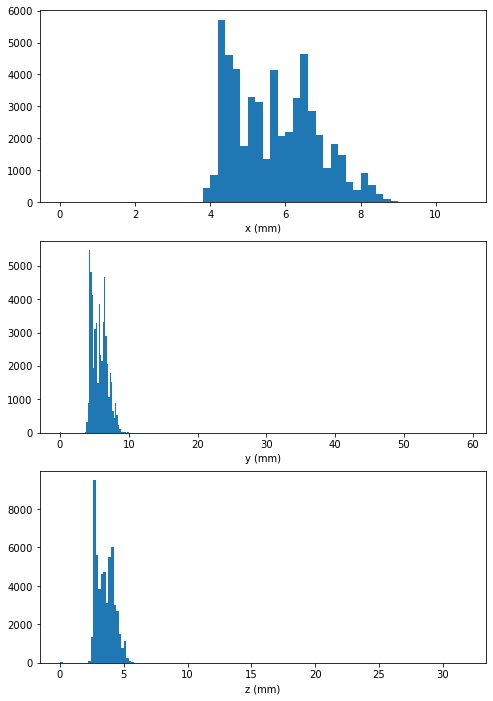

In [62]:
# commençons par les principales dimensions des diamants, avec x, y et z.

fig, ax = plt.subplots(nrows=3, figsize = [8,12])

variables = ['x', 'y', 'z']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(diamants[var]), max(diamants[var])+0.2, 0.2)
    ax[i].hist(data = diamants, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

Le tracé initial des variables x, y et z montre quelques points d'attention immédiats. Sur les graphiques y et z, la plupart des données sont définies à l'extrême gauche de leurs axes, ce qui suggère de fortes valeurs aberrantes sur la droite. Les limites de gauche des trois graphiques suggèrent également que certains points prennent des valeurs inhabituellement petites. Cela vaut la peine de prendre un peu de temps pour identifier ces valeurs aberrantes et voir si elles doivent être filtrées hors des données.

In [63]:
# identifiant ces valeurs aberrantes

incorrect = (np.abs(2 * diamants['z'] / (diamants['x'] + diamants['y']) - diamants['profondeur']/100) > 0.1)
no_info = ((diamants['x'] == 0) & (diamants['y'] == 0))

# supprimant des points avec des valeurs de profondeur incohérentes.
diamants = diamants.loc[-incorrect & -no_info,:]

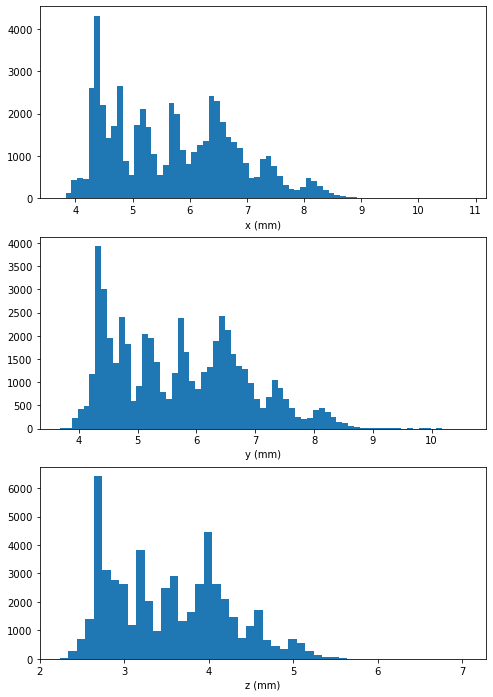

In [64]:
fig, ax = plt.subplots(nrows=3, figsize = [8,12])

variables = ['x', 'y', 'z']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(diamants[var]), max(diamants[var])+0.1, 0.1)
    ax[i].hist(data = diamants, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

La forme des distributions x, y et z est très similaire les unes aux autres. La distribution z semble légèrement différente car elle prend une plage de valeurs plus petite, et donc les bins sont plus grands dans un sens relatif. Il est probable que ces variables seront fortement corrélées les unes aux autres et auront probablement une forte corrélation avec le carat.

Avant de fermer cette section, nous allons jeter un œil aux deux dernières variables: profondeur et table.

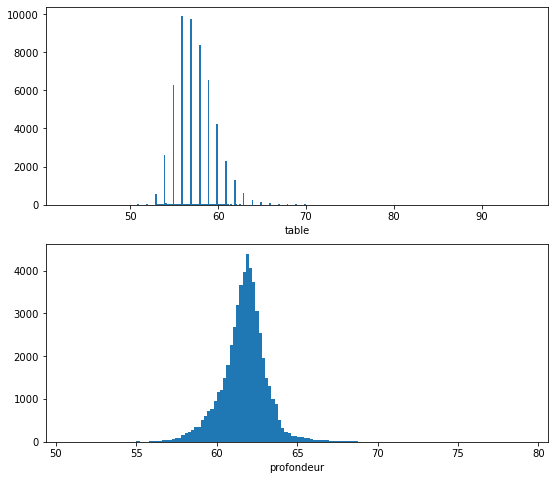

In [66]:
fig, ax = plt.subplots(nrows=2, figsize = [9,8])

variables = ['table', 'profondeur']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(diamants[var]), max(diamants[var])+0.2, 0.2)
    ax[i].hist(data = diamants, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))

plt.show()

La table et la profondeur sont tous deux unimodaux, mais les distributions sont légèrement asymétriques et semblent un peu plus étroites qu'une distribution normale. La table est légèrement inclinée à droite, tandis que la profondeur est légèrement inclinée à gauche.

## Exploration bivariées de données

Pour commencer, je souhaite examiner les corrélations par paires présentes entre les caractéristiques des données.

In [67]:
numeric_vars = ['prix', 'carat', 'profondeur', 'table', 'x', 'y', 'z']
categoric_vars = ['coupure', 'couleur', 'clarte']

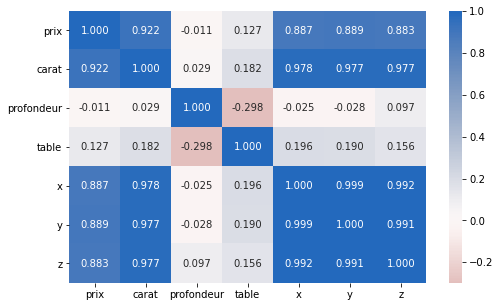

In [68]:
# diagramme de corrélation
plt.figure(figsize = [8, 5])
sb.heatmap(diamants[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

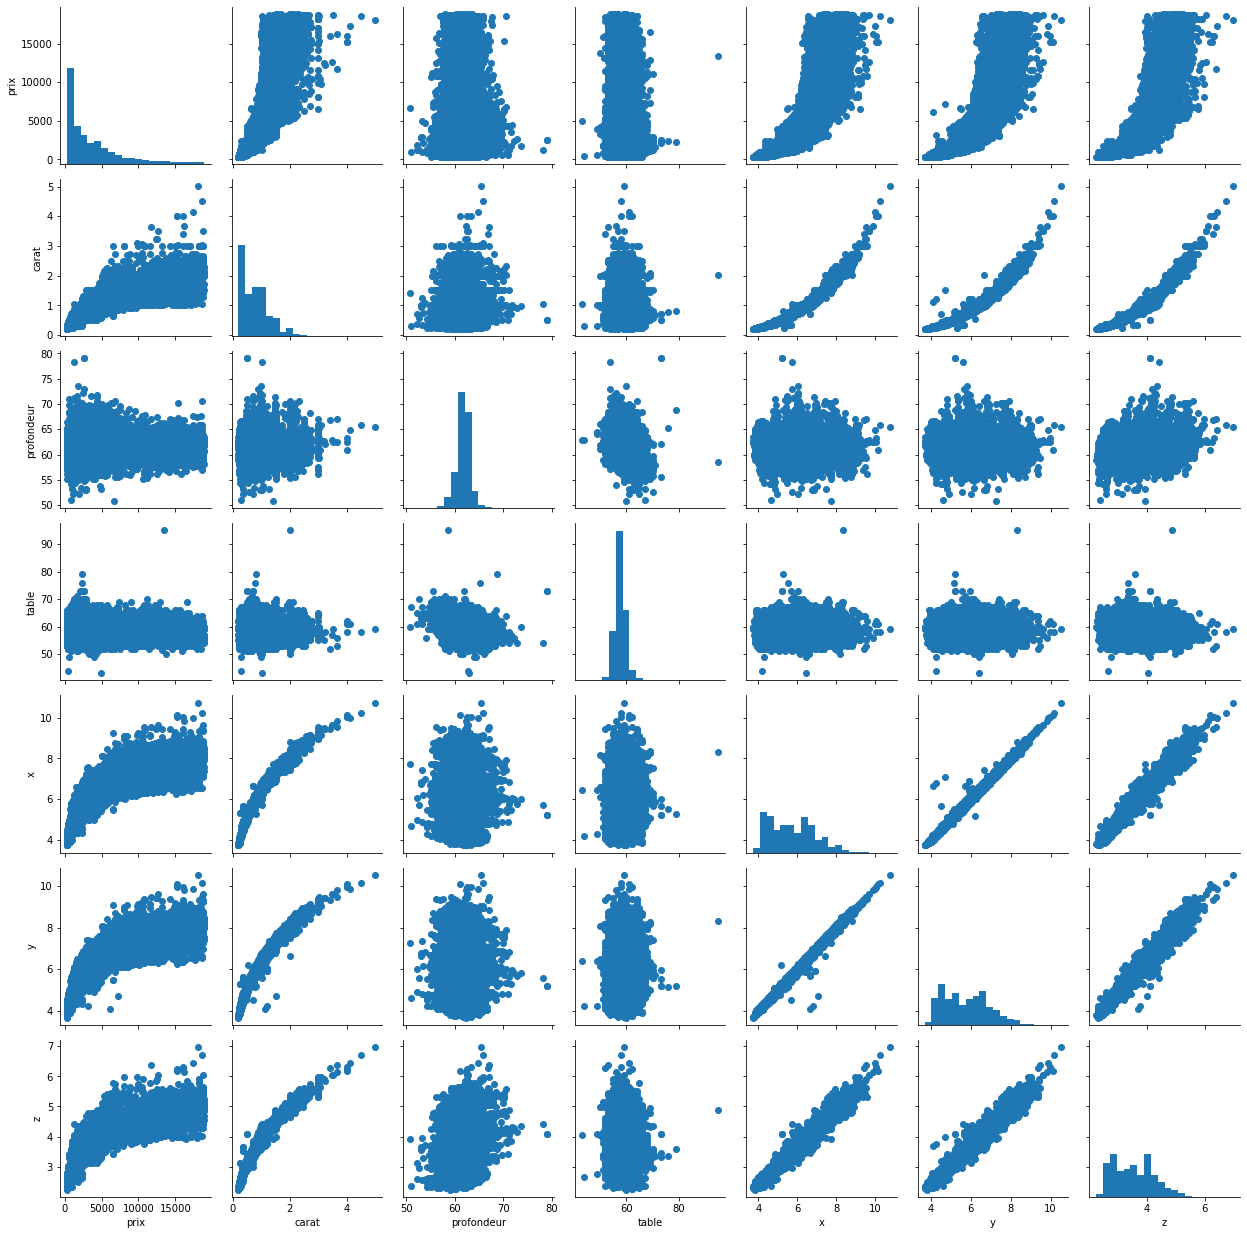

In [70]:
g = sb.PairGrid(data = diamants, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

Comme prévu, les dimensions «x», «y» et «z» sont toutes fortement corrélées les unes aux autres, et toutes sont également fortement corrélées avec le carat. Puisque le carat est une mesure de la taille du diamant, il n'est pas trop surprenant que la tendance globale entre le carat et les trois dimensions individuelles apparaisse polynomiale. De plus, puisque tous les diamants sont de taille ronde, il est logique que les tailles «x», «y» et «z» se déplacent toutes proportionnellement ensemble.

Étonnamment, le coefficient de corrélation entre le prix et le carat est très élevé, malgré le fait que le prix a une si large gamme de valeurs. La profondeur et la table n'ont pas de corrélations fortes avec les autres variables numériques de l'ensemble de données, et nous voyons la corrélation négative modérée hypothétique dans la section précédente. Je n'effectuerai aucune analyse supplémentaire avec ces variables car elles ne semblent pas être beaucoup plus intéressantes.

C:\Users\moni kolli\anaconda3\lib\site-packages\seaborn\axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\moni kolli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\moni kolli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\moni kolli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y.

<Figure size 720x720 with 0 Axes>

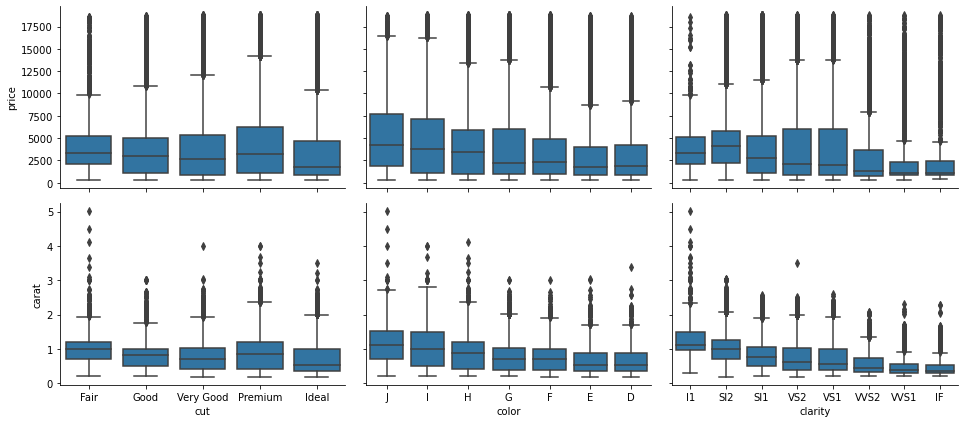

In [30]:
# matrice des variables numériques par rapport aux variables catégorielles.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10]);
g = sb.PairGrid(data = diamonds, y_vars = ['price', 'carat'], x_vars = categoric_vars,
                size = 3, aspect = 1.5);
g.map(boxgrid);
plt.show();

il semble qu'il existe des relations négatives entre les variables catégorielles et la variable numérique d'intérêt. Les diamants avec les meilleures caractéristiques (taille Ideal, couleur D, pureté IF) semblent obtenir les prix les plus bas, mais ont également tendance à être plus petits en moyenne.

# Régression linéaire:

In [33]:
import statsmodels.api as sm

In [71]:
# ajoutant la colonne de valeur: 1, sur tout les lignes
diamants['intercept'] = 1

In [72]:
# je vais encoder les variables catégorielles avec la fonction "get_dummies" et supprimer 
# la première colonne de chaque variable
diamants = pd.get_dummies(diamants , drop_first = True)
diamants

,carat,profondeur,table,prix,x,y,z,intercept,coupure_Good,coupure_Very Good,...,couleur_F,couleur_E,couleur_D,clarte_SI2,clarte_SI1,clarte_VS2,clarte_VS1,clarte_VVS2,clarte_VVS1,clarte_IF
0,0.23,61.5,55.0,326,3.95,3.98,2.43,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,1,0,...,0,1,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,1,0,0,...,0,0,1,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,1,0,...,0,0,1,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,1,0,1,...,0,0,1,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [76]:
# les variables independantes :
var_exogènes = diamants.drop(['prix'] , axis = 1)

# ma variable d'interet
var_interet = diamants.prix

In [79]:
# le model : Regression Lineaire
model = sm.OLS(diamants['prix'] , var_exogènes).fit()

In [80]:
# les Resultats :

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 2.743e+04
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        01:14:07   Log-Likelihood:            -4.5484e+05
No. Observations:               53901   AIC:                         9.097e+05
Df Residuals:                   53877   BIC:                         9.099e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
carat              1.163e+04     51.67

In [81]:
# Dusrbin Watson test :

from statsmodels.stats.stattools import durbin_watson
print('Durbin-Watson : ',durbin_watson(model.resid))

Durbin-Watson :  1.22559959906842


- si je prends le R-carré comme une métrique pour définir la précision de mon modèle alors mon modèle est précis de 92%
- mes variables indépendantes expliquent a 92% de la variance de ma variable d'intérêt "prix"

# Imene KOLLI